## 15th Oct Assignment

#Problem statement: Considering Temperature as target(or label), predict Temperature using other features in the Algerian Dataset. 

In [1]:
# Importing important libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Algerian Forest Fire Dataset
df = pd.read_csv(r"D:\ineuron\Assignments\15th Oct_Algerian Forest Fire (for temp)\Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


#we will have to convert "DC", "FWI" to float but before we did that we will have to correct data at index 165

#df['DC'] = pd.to_numeric(df['DC'], downcast = 'float') ## it is not working as data at index 165 is not inproper format. we will have to correct data at index 165

In [5]:
df.iloc[165]

day                 14
month                7
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 165, dtype: object

## Let's analyse what can we enter for "FWI" at index 165

In [6]:
## we have correct the entry at this position as it was 14.6 9 in place of 14.69

df['DC'].iloc[165] = 14.69

# converting from 'object' to 'float' 
df['DC'] = pd.to_numeric(df['DC'], downcast = 'float') 

C:\Users\ukrum\AppData\Local\Temp\ipykernel_10760\3507705981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC'].iloc[165] = 14.69


In [7]:
# Let's remove whitespaces from columns name of dataset
df.columns = df.columns.str.strip()

In [8]:
# df['FWI'] = df['FWI'].astype(float) ---> this will show error as index 165 is not a convertible digit

In [9]:
# Let's analyze what can we enter 'FWI' value at index 165

In [10]:
df[(df['Temperature'] == 37)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.699997,9.7,22.9,14.6,fire
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.400002,11.7,27.1,18.4,fire
150,29,6,2012,37,36,13,0.6,86.2,17.9,36.700001,4.8,17.8,7.2,fire
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.690000,12.5,10.4,fire,NaN
182,31,7,2012,37,55,15,0.0,89.3,28.3,67.199997,8.3,28.3,14.5,fire
190,8,8,2012,37,56,11,0.0,87.4,11.2,20.200001,5.2,11.0,5.9,fire
196,14,8,2012,37,40,13,0.0,91.9,22.3,55.500000,10.8,22.3,15.7,fire
200,18,8,2012,37,37,14,0.0,94.3,35.9,86.800003,16.0,35.9,26.3,fire
204,22,8,2012,37,53,14,0.0,89.5,41.1,127.500000,8.0,45.5,18.1,fire


In [11]:
df[(df['RH'] == 37)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.400002,11.7,27.1,18.4,fire
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.690000,12.5,10.4,fire,NaN
200,18,8,2012,37,37,14,0.0,94.3,35.9,86.800003,16.0,35.9,26.3,fire
208,26,8,2012,33,37,16,0.0,92.2,61.3,167.199997,13.1,64.0,30.3,fire


In [12]:
df[(df['Ws'] == 18)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.600000,1.3,3.4,0.5,not fire
22,23,6,2012,32,62,18,0.1,81.4,8.2,47.700001,3.3,11.5,3.8,fire
25,26,6,2012,31,64,18,0.0,86.8,17.8,71.800003,6.7,21.6,10.6,fire
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.300003,9.2,25.8,15,fire
36,7,7,2012,35,64,18,0.2,80.0,9.7,40.400002,2.8,12.1,3.2,not fire
51,22,7,2012,28,79,18,0.1,73.4,16.4,79.900002,1.8,21.7,2.8,not fire
54,25,7,2012,31,65,18,0.0,84.3,12.5,88.699997,4.8,18.5,7.3,fire
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.000000,2.2,14.1,2.6,not fire
76,16,8,2012,36,61,18,0.3,80.2,11.7,90.400002,2.8,17.6,4.2,fire
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.699997,9.7,22.9,14.6,fire


In [13]:
# From above analysis we can assign 0 for FWI. Let's do that

df['FWI'].iloc[165] = 0

C:\Users\ukrum\AppData\Local\Temp\ipykernel_10760\3026848096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FWI'].iloc[165] = 0


## Let's try what value can we replace 'NaN' value for index 165

In [14]:
df[df['Temperature'] == 37] ## From below, it seems like fire can be replaced....lets check other features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.699997,9.7,22.9,14.6,fire
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.400002,11.7,27.1,18.4,fire
150,29,6,2012,37,36,13,0.6,86.2,17.9,36.700001,4.8,17.8,7.2,fire
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.690000,12.5,10.4,0,NaN
182,31,7,2012,37,55,15,0.0,89.3,28.3,67.199997,8.3,28.3,14.5,fire
190,8,8,2012,37,56,11,0.0,87.4,11.2,20.200001,5.2,11.0,5.9,fire
196,14,8,2012,37,40,13,0.0,91.9,22.3,55.500000,10.8,22.3,15.7,fire
200,18,8,2012,37,37,14,0.0,94.3,35.9,86.800003,16.0,35.9,26.3,fire
204,22,8,2012,37,53,14,0.0,89.5,41.1,127.500000,8.0,45.5,18.1,fire


In [15]:
df[df['RH'] == 37] ## From below, it seems like fire can be replaced....lets check other features

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
149,28,6,2012,37,37,13,0.0,92.5,27.2,52.400002,11.7,27.1,18.4,fire
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.690000,12.5,10.4,0,NaN
200,18,8,2012,37,37,14,0.0,94.3,35.9,86.800003,16.0,35.9,26.3,fire
208,26,8,2012,33,37,16,0.0,92.2,61.3,167.199997,13.1,64.0,30.3,fire


In [16]:
df[df['Ws'] == 18]## From below, it seems like fire can be replaced....so we will replace with "fire"

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.600000,1.3,3.4,0.5,not fire
22,23,6,2012,32,62,18,0.1,81.4,8.2,47.700001,3.3,11.5,3.8,fire
25,26,6,2012,31,64,18,0.0,86.8,17.8,71.800003,6.7,21.6,10.6,fire
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.300003,9.2,25.8,15,fire
36,7,7,2012,35,64,18,0.2,80.0,9.7,40.400002,2.8,12.1,3.2,not fire
51,22,7,2012,28,79,18,0.1,73.4,16.4,79.900002,1.8,21.7,2.8,not fire
54,25,7,2012,31,65,18,0.0,84.3,12.5,88.699997,4.8,18.5,7.3,fire
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.000000,2.2,14.1,2.6,not fire
76,16,8,2012,36,61,18,0.3,80.2,11.7,90.400002,2.8,17.6,4.2,fire
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.699997,9.7,22.9,14.6,fire


In [17]:
# replacing 'NAN' value for "classes" at index 165

df['Classes'].iloc[165] = 'fire'

C:\Users\ukrum\AppData\Local\Temp\ipykernel_10760\3254906332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classes'].iloc[165] = 'fire'


In [18]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [19]:
# removing whitespaces from Classes

df['Classes'] = df['Classes'].str.strip()

In [20]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
df = pd.get_dummies(data = df, columns = ['Classes'], drop_first = True )

In [22]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


# Define features and Label

In [23]:
X = df.drop('Temperature', axis = 1)

In [24]:
y = df["Temperature"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_not fire
203,21,8,2012,71,15,0.0,86.0,36.9,117.099998,5.1,41.3,12.2,0
171,20,7,2012,50,16,0.0,89.9,32.7,71.000000,9.5,32.6,17.3,0
185,3,8,2012,33,17,0.0,93.7,17.1,32.099998,17.2,16.9,19.5,0
240,27,9,2012,87,15,4.4,41.1,6.5,8.000000,0.1,6.2,0,1
16,17,6,2012,89,16,0.6,37.3,1.1,7.800000,0.0,1.6,0,1


In [28]:
X_train.shape

(170, 13)

In [29]:
X_test.shape

(74, 13)

In [30]:
y_train.shape

(170,)

In [31]:
y_test.shape

(74,)

In [32]:
# Standard Scaling the data

from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

## Training Models:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression

# 1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model_reg = LinearRegression()

In [38]:
model_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
model_reg.coef_

array([-4.26182181e-01, -3.49020942e-01,  1.22124533e-15, -1.37015374e+00,
       -6.75601108e-01,  4.42229675e-02,  8.62084945e-01,  2.07605821e+00,
        1.42830803e+00,  5.04154694e-01, -2.26218124e+00, -5.83455962e-01,
       -5.54754887e-02])

In [40]:
model_reg.intercept_

31.99411764705882

In [41]:
reg_pred = model_reg.predict(X_test_scaled)

''' Lets check for 3 assumptions for LinearRegression
1. Scatter plot between y_test and model predictions should be approximately linear
2. displot of residual should be approximately normal distribution
3. Scatter plot between residual and model prediction should not show any pattern i.e. it should show random distribution

'''

Text(0, 0.5, 'Regression Predictions')

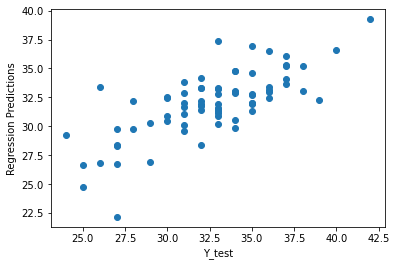

In [42]:
plt.scatter(y_test, reg_pred)

plt.xlabel('Y_test')
plt.ylabel('Regression Predictions')

In [43]:
residual_reg = y_test - reg_pred

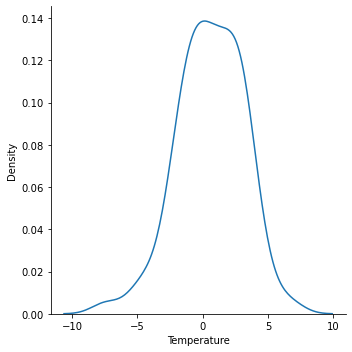

In [44]:
sns.displot(residual_reg, kind = 'kde')

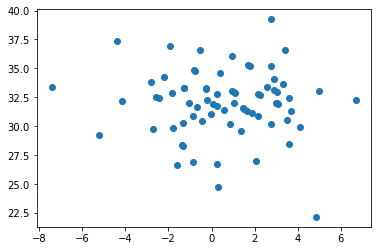

In [45]:
plt.scatter(residual_reg, reg_pred)

In [46]:
# We are good with the 3 assumptions

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
mae_reg = mean_absolute_error(y_test, reg_pred)

In [49]:
mse_reg = mean_squared_error(y_test, reg_pred)

In [50]:
rmse_reg = np.sqrt(mse_reg)

In [51]:
print(mae_reg, mse_reg, rmse_reg)

2.0688884896792095 6.625685479334473 2.57404069107978


In [52]:
# lets check performance matrics : r-squared and adjusted_r_squared

In [53]:
from sklearn.metrics import r2_score

In [54]:
r_squared_reg = r2_score(y_test, reg_pred)

In [55]:
adjusted_r_squared_reg = 1 - ((1- r_squared_reg)* (len(y_test)-1))/(len(y_test) - X_test.shape[1]-1)

In [56]:
r_squared_reg , adjusted_r_squared_reg


(0.5135970709740113, 0.4082097696850471)

# 2. Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

In [58]:
model_ridge = Ridge()

In [59]:
model_ridge.fit(X_train_scaled, y_train)

Ridge()

In [60]:
model_ridge.coef_

array([-0.41404835, -0.33542184,  0.        , -1.36921681, -0.66757668,
        0.02121157,  0.83708199,  0.51379062,  0.52917992,  0.47401725,
        0.09464251, -0.52151868, -0.06495379])

In [61]:
model_ridge.intercept_

31.99411764705882

In [62]:
ridge_pred = model_ridge.predict(X_test_scaled)

In [63]:
ridge_pred

array([33.15906847, 32.75832261, 34.23422741, 29.72855862, 32.2509985 ,
       32.90779869, 34.63178725, 36.60507847, 36.62237067, 31.37041512,
       24.76965105, 31.03187897, 28.47479267, 39.03322613, 32.76947627,
       28.42877931, 32.80477065, 37.15453451, 32.40246745, 31.52512871,
       33.221859  , 31.51401688, 33.35207062, 35.18207857, 31.20950126,
       33.36740153, 32.93326466, 30.29924023, 34.72612356, 32.2174675 ,
       33.55655617, 34.21277539, 26.72021762, 34.62999925, 32.98825094,
       26.71070831, 28.34240751, 35.29568735, 33.25850038, 31.85159144,
       29.2662746 , 33.85525302, 30.866551  , 33.23066106, 32.96698446,
       29.80948832, 33.39125103, 30.26410789, 35.8854653 , 32.06532919,
       30.22305006, 32.03500762, 31.17191693, 32.48338212, 32.50016403,
       31.41951219, 30.49948889, 30.39054234, 32.89650223, 35.16047118,
       29.83446852, 27.00236369, 29.52041337, 30.85444305, 31.60421153,
       26.76144699, 34.12906955, 33.00127315, 22.25733771, 31.51

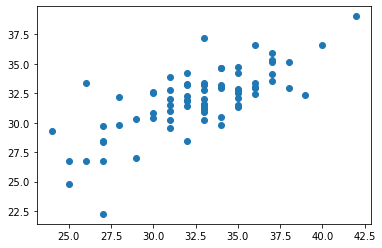

In [64]:
plt.scatter(y_test, ridge_pred)

In [65]:
residual_ridge = y_test - ridge_pred

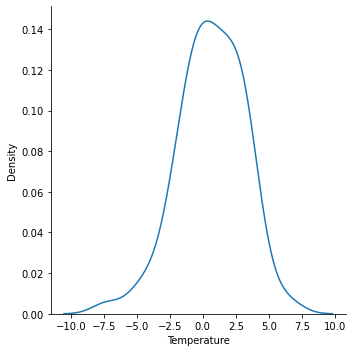

In [66]:
sns.displot(residual_ridge, kind = 'kde')

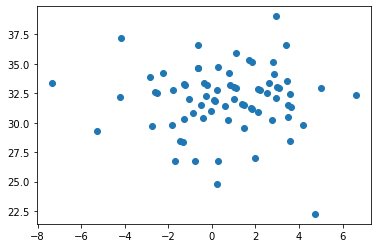

In [67]:
plt.scatter(residual_ridge, ridge_pred)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
mae_ridge = mean_absolute_error(y_test, ridge_pred)

In [70]:
mse_ridge = mean_squared_error(y_test, ridge_pred)

In [71]:
rmse_ridge = np.sqrt(mse_ridge)

In [72]:
print(mae_ridge, rmse_ridge, mse_ridge)

2.0450441649434494 2.5620017213366477 6.563852820131946


In [73]:
from sklearn.metrics import r2_score

In [74]:
r_squared_ridge = r2_score(y_test, ridge_pred)

In [75]:
adjusted_r_squared_ridge = 1 - ((1- r_squared_ridge)* (len(y_test)-1))/(len(y_test) - X_test.shape[1]-1)

In [76]:
print( r_squared_ridge, adjusted_r_squared_ridge)

0.5181363124818343 0.4137325135195652


# 3. Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

In [78]:
model_lasso = Lasso()

In [79]:
model_lasso.fit(X_train_scaled, y_train)

Lasso()

In [80]:
model_lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.91388566, -0.        ,
       -0.        ,  0.77518976,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ])

In [81]:
model_lasso.intercept_

31.99411764705882

In [82]:
lasso_pred = model_lasso.predict(X_test_scaled)

In [83]:
lasso_pred

array([33.29127182, 32.17746846, 33.38806446, 30.38777141, 32.24815692,
       32.31720614, 33.37737845, 34.72833071, 34.83272416, 32.02498799,
       28.56889276, 31.05852313, 29.65824667, 35.24598336, 32.67909211,
       30.3571516 , 31.95121435, 34.26020328, 32.51983043, 32.041017  ,
       32.23624149, 31.23134722, 31.88668076, 33.51423973, 31.65816883,
       32.458181  , 33.13653353, 31.36307427, 32.69902592, 32.30590155,
       33.02145407, 32.4215996 , 29.17552844, 33.6876824 , 32.93987083,
       29.26964569, 30.02198065, 33.99983436, 32.41687518, 32.87266962,
       31.30409246, 32.94130904, 30.9656353 , 32.855821  , 32.61435749,
       31.55624197, 33.08700831, 31.07907552, 34.06354059, 32.18527806,
       31.14503956, 32.34597794, 31.97381578, 32.71649313, 31.95059576,
       32.17787827, 31.05523691, 30.14240311, 33.0489887 , 33.15256254,
       30.73300979, 28.13179495, 31.00550291, 31.51493616, 31.90990853,
       29.14100383, 32.8597258 , 32.28576671, 28.77583165, 32.15

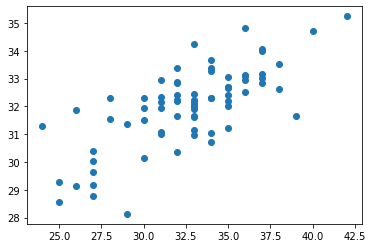

In [84]:
plt.scatter(y_test, lasso_pred)

In [85]:
residual_lasso = y_test - lasso_pred

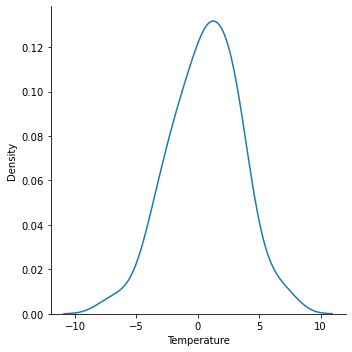

In [86]:
sns.displot(residual_lasso, kind = 'kde')

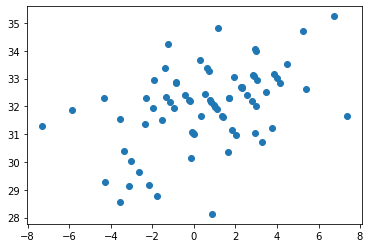

In [87]:
plt.scatter(residual_lasso, lasso_pred)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [89]:
mae_lasso = mean_absolute_error(y_test, lasso_pred)

In [90]:
mse_lasso = mean_squared_error(y_test, lasso_pred)

In [91]:
rmse_lasso = np.sqrt(mse_lasso)

In [92]:
print(mae_lasso, rmse_lasso, mse_lasso)

2.3192459485031636 2.871424883709956 8.245080862788734


In [93]:
from sklearn.metrics import r2_score

In [94]:
r_squared_lasso = r2_score(y_test, lasso_pred)

In [95]:
adjusted_r_squared_lasso= 1 - ((1- r_squared_lasso)* (len(y_test)-1))/(len(y_test) - X_test.shape[1]-1)

In [96]:
r_squared_lasso

0.3947144798488986

In [97]:
adjusted_r_squared_lasso

0.26356928381615996

# 4. ElasticNet

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
model_elastic = ElasticNet()

In [100]:
model_elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [101]:
model_elastic.coef_

array([-0.        , -0.        ,  0.        , -0.74846573, -0.19212161,
       -0.        ,  0.57669844,  0.12143501,  0.        ,  0.25858408,
        0.04543488,  0.14508822, -0.13838423])

In [102]:
model_elastic.intercept_

31.99411764705882

In [103]:
elastic_pred = model_elastic.predict(X_test_scaled)

In [104]:
elastic_pred

array([32.62545926, 32.20415531, 33.60941517, 30.02787076, 31.95646979,
       32.10718101, 33.76635517, 35.4177821 , 35.77994619, 31.97270978,
       28.1625163 , 30.84893701, 29.46920176, 36.37241645, 32.70882639,
       29.71182992, 32.63466772, 35.42856447, 32.6612447 , 31.92281563,
       32.60667153, 31.03469115, 32.08506378, 33.40653819, 31.25415503,
       33.0598216 , 33.2631514 , 31.1713442 , 33.54590879, 31.57835187,
       33.46842901, 32.36091586, 28.71880209, 33.85664249, 33.2399177 ,
       29.25586311, 29.5042719 , 33.94135279, 32.52423354, 32.2539077 ,
       30.85316656, 33.26548564, 30.74570628, 32.77473452, 32.01579643,
       30.77353011, 33.33259685, 31.27359218, 34.5594875 , 32.56233304,
       30.64859488, 32.40606824, 31.36691831, 32.77881341, 31.49537892,
       31.82547569, 30.8363247 , 30.03776648, 32.52250672, 33.87849671,
       30.44791552, 28.41722535, 30.4662057 , 31.02986606, 32.01139692,
       28.56051483, 33.06451906, 32.45272029, 27.76605163, 32.01

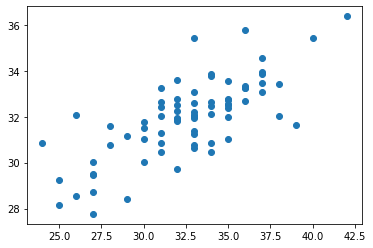

In [105]:
plt.scatter(y_test, elastic_pred)

In [106]:
residual_elastic = y_test - elastic_pred

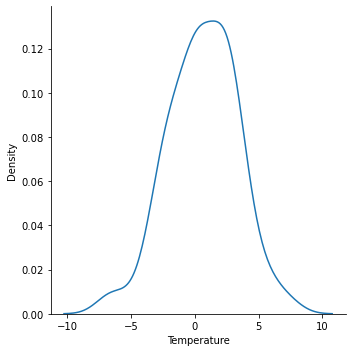

In [107]:
sns.displot(residual_elastic, kind = 'kde')

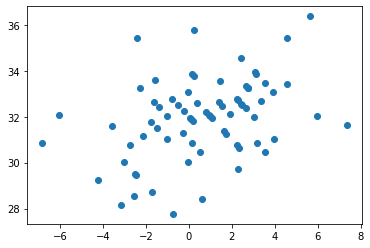

In [108]:
plt.scatter(residual_elastic, elastic_pred)

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [110]:
mse_elastic = mean_squared_error(y_test, elastic_pred)

In [111]:
mae_elastic = mean_absolute_error(y_test, elastic_pred)

In [112]:
rmse_elastic = np.sqrt(mse_elastic)

In [113]:
print(mae_elastic, mse_elastic, rmse_elastic)

2.201277524780754 7.54727642287093 2.7472306825002755


In [114]:
from sklearn.metrics import r2_score

In [115]:
r_squared_elastic = r2_score(y_test, elastic_pred)

In [116]:
adjusted_r_squared_elastic= 1 - ((1- r_squared_elastic)* (len(y_test)-1))/(len(y_test) - X_test.shape[1]-1)

In [117]:
r_squared_elastic

0.4459414999847008

In [118]:
adjusted_r_squared_elastic

0.32589549164805265

# Let's check how our models performed:

In [119]:
data = {'Mean_Squared_Errors': [mse_reg, mse_ridge, mse_lasso, mse_elastic],
        "RMSE" : [rmse_reg,rmse_ridge, rmse_ridge, rmse_elastic ],
        'MAE': [mae_reg, mae_ridge, mae_lasso, mae_elastic],
        'R_squared': [r_squared_reg, r_squared_ridge, r_squared_lasso, r_squared_elastic],
        'adjusted_r_squared' : [adjusted_r_squared_reg, adjusted_r_squared_ridge, adjusted_r_squared_lasso, adjusted_r_squared_elastic]
    
}

In [120]:
com = pd.DataFrame(data, index= ['Reg',  'Ridge', 'Lasso', 'Elastic'])

In [121]:
com

,Mean_Squared_Errors,RMSE,MAE,R_squared,adjusted_r_squared
Reg,6.625685,2.574041,2.068888,0.513597,0.408210
Ridge,6.563853,2.562002,2.045044,0.518136,0.413733
Lasso,8.245081,2.562002,2.319246,0.394714,0.263569
Elastic,7.547276,2.747231,2.201278,0.445941,0.325895


#CONCLUSION

# Without hyperparameter tunning, Ridge Regression is the best algorithm here